In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
import os
import sys
import json
import random
from pathlib import Path
from typing import Dict, List, Tuple, Union

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.pyplot import imshow, show
import PIL
from PIL import Image
import cv2
import numpy as np

In [28]:
# sandbox/preprocessing
sys.path.append("../../")
from src.patching.coco_annotation import extract_pyramid_patches

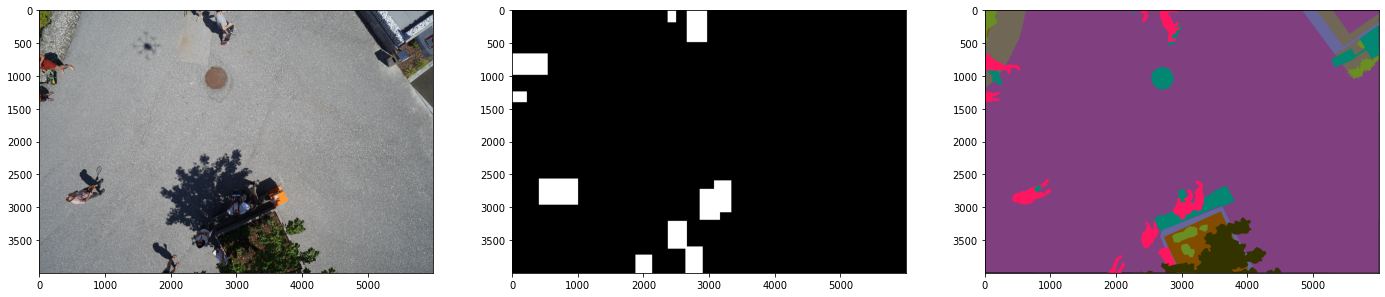

In [45]:
DATA_PATH = '/Users/jacopo/Downloads/semantic_drone_dataset/training_set'
FILE = '000'

image_path = f"{DATA_PATH}/images/{FILE}.jpg"
mask_box_path = f"{DATA_PATH}/gt/bounding_box/masks/person/{FILE}.png"
mask_pix_path = f"{DATA_PATH}/gt/semantic/label_images/{FILE}.png"

image = Image.open(image_path)
mask_box = Image.open(mask_box_path)
mask_pix = Image.open(mask_pix_path)

_, axs = plt.subplots(1, 3, figsize=(24, 12))
axs = axs.flatten()
axs[0].imshow(image)
axs[1].imshow(mask_box)
axs[2].imshow(mask_pix)
plt.show()

In [46]:
print(image.width, image.height, mask_box.width, mask_box.height, mask_pix.width, mask_pix.height)

mask_box_array = np.asarray(mask_box, dtype="int8")
mask_pix_array = np.asarray(mask_pix, dtype="int8")

print(mask_box_array.shape, np.unique(mask_box_array[:,:,0]), np.unique(mask_box_array[:,:,1]), np.unique(mask_box_array[:,:,2]))
print(mask_pix_array.shape, np.unique(mask_pix_array[:,:,0]), np.unique(mask_pix_array[:,:,1]), np.unique(mask_pix_array[:,:,2]))


6000 4000 6000 4000 6000 4000
(4000, 6000, 3) [-1  0] [-1  0] [-1  0]
(4000, 6000, 3) [-128 -126   -1    0    2   51  102  107  112] [-121 -114    0   22   51   64   76  102  103] [-128 -100    0   35   87   96  115]


In [47]:
mask_box_array = np.where(mask_box_array[:,:,0] == -1, 1, 0)
mask_pix_array = np.where(mask_pix_array[:,:,0] == -1, 1, 0)

print(mask_box_array.shape, np.unique(mask_box_array))
print(mask_pix_array.shape, np.unique(mask_pix_array))


(4000, 6000) [0 1]
(4000, 6000) [0 1]


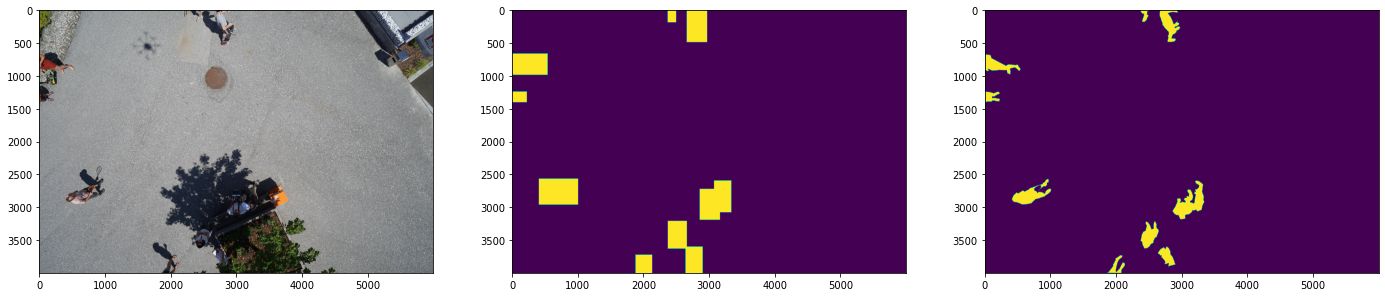

In [48]:
_, axs = plt.subplots(1, 3, figsize=(24, 12))
axs = axs.flatten()
axs[0].imshow(image)
axs[1].imshow(mask_box_array)
axs[2].imshow(mask_pix_array)
plt.show()

In [58]:
patch_images = []

patch512 = extract_pyramid_patches(
    image=image, 
    mask=mask_box,
    classes=[1, 2, 3, 4],                                                               
    patch_dimension=(512,512), 
    window_overlap=0.3,
    threshold=100)

patch_images.extend(patch512)

In [59]:
len(patch_images)

64

In [60]:
patch1024 = extract_windowed_patches_and_mask_images_sub_annotation(image=image, 
    annotations=image_annotations,
    classes=[1, 2, 3, 4],                                                               
    patch_dimension=(1024,1024), 
    window_overlap=0.3,
    threshold=100)

patch_images.extend((x.resize((512, 512)), y.resize((512, 512))) for x, y in patch1024)

In [61]:
len(patch1024), len(patch_images)

(29, 93)

In [62]:
patch2048 = extract_windowed_patches_and_mask_images_sub_annotation(image=image, 
    annotations=image_annotations,
    classes=[1, 2, 3, 4],                                                               
    patch_dimension=(2048,2048), 
    window_overlap=0.3,
    threshold=100)

patch_images.extend((x.resize((512, 512)), y.resize((512, 512))) for x, y in patch2048)

In [63]:
len(patch2048), len(patch_images)

(16, 109)

In [64]:
patch3632 = extract_windowed_patches_and_mask_images_sub_annotation(image=image, 
    annotations=image_annotations,
    classes=[1, 2, 3, 4],                                                               
    patch_dimension=(3632,3632), 
    window_overlap=0.3,
    threshold=100)

patch_images.extend((x.resize((512, 512)), y.resize((512, 512))) for x, y in patch3632)

In [65]:
len(patch3632), len(patch_images)

(3, 112)

In [ ]:
for i in range(len(patch_images)):
    _, axs = plt.subplots(1, 2, figsize=(12, 12))
    axs = axs.flatten()
    axs[0].imshow(patch_images[i][0])
    axs[1].imshow(patch_images[i][1])
    plt.show()